# NOTEBOOK_ML📕
Prévision crédit Immobilier 

In [1]:
import mysql.connector
import pymysql
import sqlite3

In [2]:
data_base = mysql.connector.connect(host="localhost" , user="root" , password="youcef" , database="loan_prediction")
cur = data_base.cursor(buffered=True)
query = "select * from loan_prediction.df_clean_train"
cur.execute(query)
tables = cur.fetchone()

In [3]:
# Importer les packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
# from transformers import pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , StackingClassifier , GradientBoostingClassifier
# from sklearn.metrics import plot_confusion_matrix , classification_report
from scikitplot.estimators import plot_learning_curve
import scikitplot as skplt
from yellowbrick.model_selection import LearningCurve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion
import pickle

# DATA

In [4]:
df_clean=pd.read_sql(query , data_base)

C:\Users\simplon\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [5]:
df_clean


,MyUnknownColumn,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
559,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
560,611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
561,612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df_clean.head()

,MyUnknownColumn,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df_clean.drop(['Loan_ID'], axis=1)

,MyUnknownColumn,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
559,609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
560,611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
561,612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
df_clean = df_clean.drop(['Loan_ID', 'MyUnknownColumn'], axis=1)

In [9]:
df_clean

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
558,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
559,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
560,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
561,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             563 non-null    object 
 1   Married            563 non-null    object 
 2   Dependents         563 non-null    int64  
 3   Education          563 non-null    object 
 4   Self_Employed      563 non-null    object 
 5   ApplicantIncome    563 non-null    int64  
 6   CoapplicantIncome  563 non-null    float64
 7   LoanAmount         563 non-null    float64
 8   Loan_Amount_Term   563 non-null    float64
 9   Credit_History     563 non-null    float64
 10  Property_Area      563 non-null    object 
 11  Loan_Status        563 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 52.9+ KB


In [11]:
df_clean.dropna(inplace=True)

# LabelEncoder sur la Target

In [12]:
lBE = LabelEncoder()
categ = ["Loan_Status"]
df_clean[categ] = df_clean[categ].apply(lBE.fit_transform)
df_clean


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
558,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,1
559,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
560,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
561,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


# ONEHOTENCODER sur les variables

In [13]:
ohe = OneHotEncoder(handle_unknown='ignore')
One_hot = pd.DataFrame(ohe.fit_transform(df_clean[["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]]).toarray())
One_hot.columns = ohe.get_feature_names_out(["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"])
One_hot

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
559,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
560,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
561,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


# CONCATENATION DU LABEL ET ONEHOT ENCODER

In [14]:
df_encoded = pd.concat([df_clean, One_hot], axis=1)


In [15]:
df_encoded

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
559,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
560,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
561,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


# Split

In [19]:
X = df_encoded.drop(["Loan_Status"], axis=1)
y = df_encoded.Loan_Status

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline et  Preprocessing

In [21]:
numeric_features = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount",
                    "Loan_Amount_Term", "Credit_History"]
numeric_transformer = Pipeline(
    steps=[
        ("scaler", MinMaxScaler())]
)

categorical_features = ["Gender", "Married", "Dependents",
                        "Education", "Self_Employed", "Property_Area"]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder())
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

#  LogisiticRegression

In [22]:
LogicReg = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression())]
)


In [23]:
LogicReg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', LogisticRegression())])

# Evaluation

In [24]:
print("accuracy train : %.3f"%LogicReg.score(X_train, y_train))
print("accuracy test : %.3f"%LogicReg.score(X_test , y_test))   

accuracy train : 0.818
accuracy test : 0.796


In [25]:
y_pred_LogicReg = LogicReg.predict(X_test) 

In [26]:
print(classification_report(y_test, y_pred_LogicReg))

              precision    recall  f1-score   support

           0       1.00      0.39      0.57        38
           1       0.77      1.00      0.87        75

    accuracy                           0.80       113
   macro avg       0.88      0.70      0.72       113
weighted avg       0.84      0.80      0.77       113



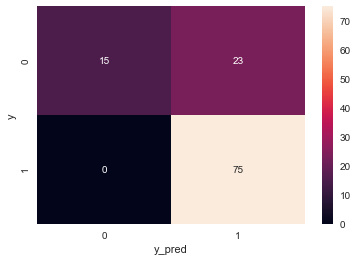

In [27]:
# Matrice confusion
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_LogicReg)

# Learning-Curve

C:\Users\simplon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 430, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\pipeline.py", line 719, in score
    Xt = transform.transform(Xt)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 799, in transform
    Xs = self._fit_transform(
  File "C:\

C:\Users\simplon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 430, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\pipeline.py", line 719, in score
    Xt = transform.transform(Xt)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 799, in transform
    Xs = self._fit_transform(
  File "C:\

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

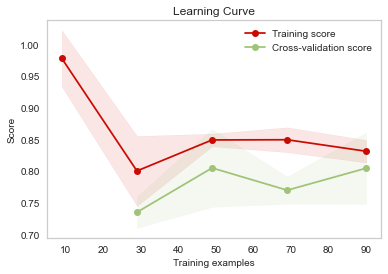

In [28]:
plot_learning_curve(LogicReg,X_test , y_test)

# ROC-AUC

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

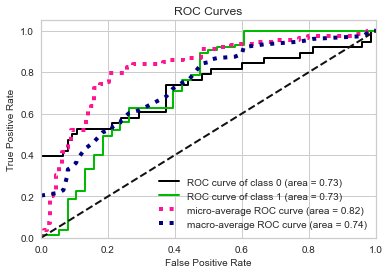

In [29]:
LogicReg.fit(X_train, y_train)
y_probas = LogicReg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# KNeighborsClassifier

In [30]:
KNC = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier",  KNeighborsClassifier())]
)

In [31]:
KNC.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', KNeighborsClassifier())])

# Evaluation

In [32]:
print("accuracy train : %.3f"%KNC.score(X_train, y_train))
print("accuracy test : %.3f"%KNC.score(X_test , y_test))

accuracy train : 0.800
accuracy test : 0.726


In [33]:
y_pred_KNC = KNC.predict(X_test) 

In [34]:
print(classification_report(y_test, y_pred_KNC))

              precision    recall  f1-score   support

           0       0.77      0.26      0.39        38
           1       0.72      0.96      0.82        75

    accuracy                           0.73       113
   macro avg       0.74      0.61      0.61       113
weighted avg       0.74      0.73      0.68       113



# matrice confusion

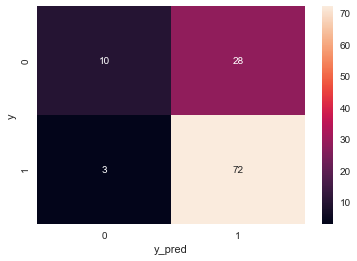

In [35]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_KNC)

# learning-Curve

C:\Users\simplon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 430, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\pipeline.py", line 719, in score
    Xt = transform.transform(Xt)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 799, in transform
    Xs = self._fit_transform(
  File "C:\

C:\Users\simplon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 430, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\pipeline.py", line 719, in score
    Xt = transform.transform(Xt)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 799, in transform
    Xs = self._fit_transform(
  File "C:\

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

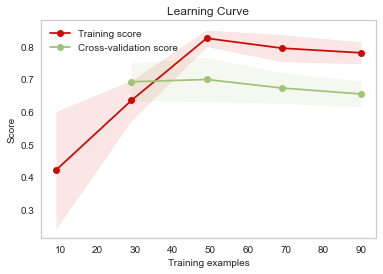

In [36]:
plot_learning_curve(KNC,X_test , y_test)

# roc-auc

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

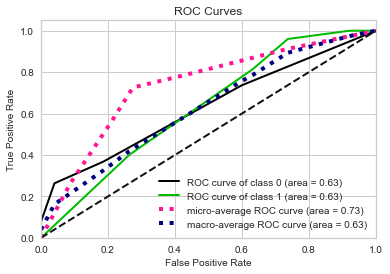

In [37]:
KNC.fit(X_train, y_train) 
y_probas = KNC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# DecisionTree

In [39]:
DT = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", DecisionTreeClassifier())]
)


In [40]:
DT.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', DecisionTreeClassifier())])

# Evaluation

In [41]:
print("accuracy train : %.3f"%DT.score(X_train, y_train))
print("accuracy test : %.3f"%DT.score(X_test , y_test))

accuracy train : 1.000
accuracy test : 0.752


In [42]:
y_pred_DT = DT.predict(X_test) 

In [43]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.64      0.61      0.62        38
           1       0.81      0.83      0.82        75

    accuracy                           0.75       113
   macro avg       0.72      0.72      0.72       113
weighted avg       0.75      0.75      0.75       113



# matrice confusion

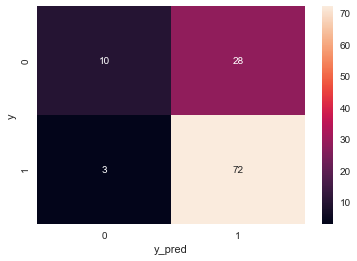

In [44]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_KNC)

# learning-Curve

C:\Users\simplon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 430, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\pipeline.py", line 719, in score
    Xt = transform.transform(Xt)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 799, in transform
    Xs = self._fit_transform(
  File "C:\

C:\Users\simplon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 430, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\pipeline.py", line 719, in score
    Xt = transform.transform(Xt)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 799, in transform
    Xs = self._fit_transform(
  File "C:\

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

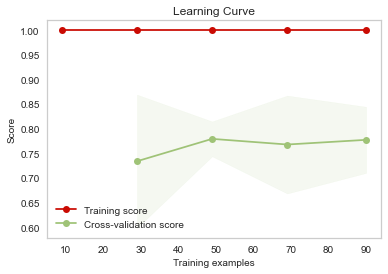

In [45]:
plot_learning_curve(DT, X_test , y_test)

# roc-auc

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

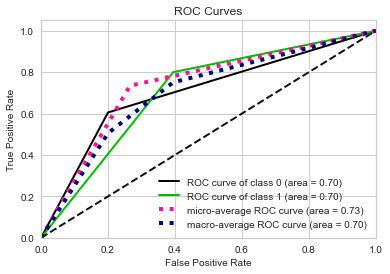

In [46]:
DT.fit(X_train, y_train)
y_probas = DT.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# RandomForestClassifier

In [47]:
RFC = GBC = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier())]
)

In [48]:
RFC.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', RandomForestClassifier())])

In [49]:
print("accuracy train : %.3f"%RFC.score(X_train, y_train))
print("accuracy test : %.3f"%RFC.score(X_test , y_test))

accuracy train : 1.000
accuracy test : 0.788


In [50]:
y_pred_RFC = RFC.predict(X_test) 

In [51]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.94      0.39      0.56        38
           1       0.76      0.99      0.86        75

    accuracy                           0.79       113
   macro avg       0.85      0.69      0.71       113
weighted avg       0.82      0.79      0.76       113



# matrice confusion

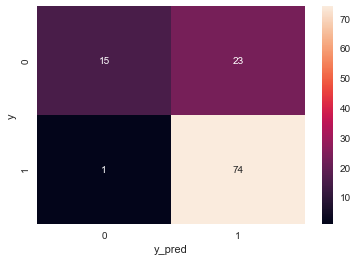

In [52]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_RFC)

# learning-Curve

C:\Users\simplon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 430, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\pipeline.py", line 719, in score
    Xt = transform.transform(Xt)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 799, in transform
    Xs = self._fit_transform(
  File "C:\

C:\Users\simplon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 430, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\pipeline.py", line 719, in score
    Xt = transform.transform(Xt)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 799, in transform
    Xs = self._fit_transform(
  File "C:\

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

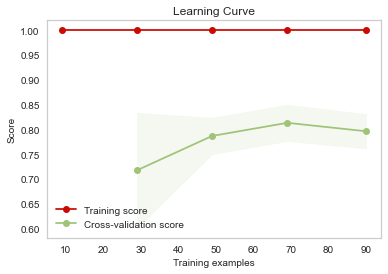

In [53]:
plot_learning_curve(RFC, X_test , y_test)

# roc-auc

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

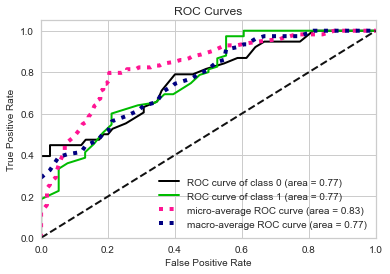

In [54]:
RFC.fit(X_train, y_train)
y_probas = RFC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# GradientBoostingClassifier

In [55]:
GBC = GBC = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", GradientBoostingClassifier())]
)

In [56]:
GBC.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', GradientBoostingClassifier())])

In [57]:
print("accuracy train : %.3f"%GBC.score(X_train, y_train))
print("accuracy test : %.3f"%GBC.score(X_test , y_test))

accuracy train : 0.902
accuracy test : 0.779


In [58]:
y_pred_GBC = GBC.predict(X_test) 

In [59]:
print(classification_report(y_test, y_pred_GBC))

              precision    recall  f1-score   support

           0       0.84      0.42      0.56        38
           1       0.77      0.96      0.85        75

    accuracy                           0.78       113
   macro avg       0.80      0.69      0.71       113
weighted avg       0.79      0.78      0.75       113



# matrice confusion

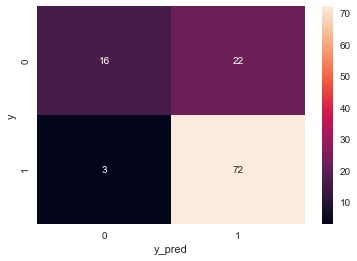

In [60]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_GBC)

# learning-Curve

C:\Users\simplon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 430, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\pipeline.py", line 719, in score
    Xt = transform.transform(Xt)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 799, in transform
    Xs = self._fit_transform(
  File "C:\

C:\Users\simplon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 430, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\pipeline.py", line 719, in score
    Xt = transform.transform(Xt)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\simplon\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 799, in transform
    Xs = self._fit_transform(
  File "C:\

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

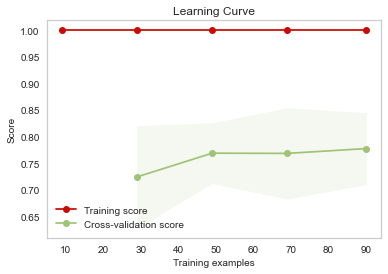

In [61]:
plot_learning_curve(GBC,X_test , y_test)

# roc-auc

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

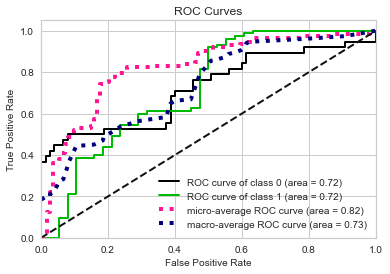

In [62]:
GBC.fit(X_train, y_train)
y_probas = GBC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

In [63]:
print(X_test)

     Gender Married  Dependents Education Self_Employed  ApplicantIncome  \
250    Male     Yes           0  Graduate            No             2620   
521    Male      No           0  Graduate            No             3333   
268    Male     Yes           2  Graduate            No             4400   
55     Male     Yes           0  Graduate            No             3366   
549    Male      No           0  Graduate            No             2987   
..      ...     ...         ...       ...           ...              ...   
88   Female     Yes           0  Graduate            No             2484   
320    Male     Yes           0  Graduate            No             2625   
357    Male     Yes           0  Graduate            No             5488   
33     Male     Yes           0  Graduate            No             2275   
244    Male     Yes           2  Graduate            No             4708   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  ...  \
250       

In [64]:
prediction = GBC.predict(X_test)

In [65]:
print(prediction)

[1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1]


In [92]:
## TAken data from the dataset
t = GBC.predict([[0.0,	0.0,	0.0,	1,	0.0,	1811,	1666.0,	54.0,	360.0,	1.0,	2]])

C:\Users\simplon\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [93]:
print(t)


[1]


In [66]:
y_pred_GBC

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [68]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
250,Male,Yes,0,Graduate,No,2620,2223.0,150.0,360.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
521,Male,No,0,Graduate,No,3333,0.0,70.0,360.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
268,Male,Yes,2,Graduate,No,4400,0.0,127.0,360.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
55,Male,Yes,0,Graduate,No,3366,2200.0,135.0,360.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
549,Male,No,0,Graduate,No,2987,0.0,88.0,360.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
320,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
357,Male,Yes,0,Graduate,No,5488,0.0,125.0,360.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
33,Male,Yes,0,Graduate,No,2275,2067.0,128.0,360.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [94]:
# model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
# classify(model, X, y)

In [95]:
# faire une prevision 
# profil_test=[[1,1,1,0,0,0,1,0,1,0,100,0,400,360]]
# RFC.predict(profil_test)

# Enregsiter le modele

# PICKLE

In [75]:
import pickle


In [77]:
file = 'model_2.pkl'
with open(file, 'wb') as f:
    pickle.dump(GBC, f)


In [76]:
# file = '../models/model_2.pkl'
# with open('../models/model_2.pkl', 'wb') as f:
#     pickle.dump(GBC, f) 

In [97]:
# now you can save it to a file
file = './Model/ML_Model1.pkl'
with open(file, 'wb') as f:
    pickle.dump(KNC, f)

In [98]:
# enregistrer le modèle
# pickle.dump(GBC,open('model.pkl','wb'))

In [99]:
# import pickle
# # now you can save it to a file
# file = './model_pkl.pickle.pkl'
# with open('model_pkl.pickle', 'wb') as file:
#     pickle.dump(svc, f)

In [100]:
# pickle_out = open("classifier.pkl", mode = 'wb')
# pickle.dump(model, pickle_out)
# # pickle_out.close()

In [101]:
# filename="model.pkl"


In [102]:
# import pickle
# with open(filename, 'wb') as f:
#     pickle.dump(RFC, f)

In [103]:
# with open(filename, 'rb') as f:
#     m = pickle.load(f)

In [104]:
# Export pipeline as pickle file
# with open("model.pkl", "wb") as file:
#     pickle.dump(pipe_model, file)

# # Load pipeline from pickle file
# my_pipeline = pickle.load(open("model.pkl","rb"))

# # Et on test le score
# my_pipeline.score(X_test, y_test)

In [105]:
# import pickle

# with open("model.pkl", "wb") as file:
#     pickle.dump(GBC, file)

In [106]:
# with open(file, 'rb') as f:
#     k = pickle.load(f)

In [107]:
# K = k.predict([[0.0,	0.0,	0.0,	1,	0.0,	4230,	0.0,	112.0,	360.0,	1.0,	1]])
# print(K)

# MONITORING

In [78]:
from sqlalchemy import column
from sqlalchemy import create_engine
# sqlalchemy.py 
from sqlalchemy import *


In [79]:
engine=create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format
                     (host="localhost",user="root",pw="youcef",db="loan_prediction"))
conne=engine.connect()
X_test.to_sql('ml_pred',conne,if_exists='replace',index = False)

113

In [80]:
import wandb
import random
import time
import wandb
from wandb import AlertLevel

In [81]:
# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="my-awesome-project",
    
    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "ML",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset
    
    # log metrics to wandb
    wandb.log({"recall": rec, "loss": loss})
    
# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: youcef-boucheta-simplon (youcef-b). Use `wandb login --relogin` to force relogin


NameError: name 'rec' is not defined

In [ ]:
acc = 0.85
threshold = 0.80

if acc < threshold:
    wandb.alert(
        title="Low accuracy", 
        text=f"Recall {acc} is below the acceptable theshold {threshold}",
        level=AlertLevel.WARN,
        wait_duration=300
    )

In [ ]:
# acc = 0.20
if acc < threshold:
    wandb.alert(
        title="Low accuracy", 
        text=f"Recall {acc} is below the acceptable theshold {threshold}",
        level=AlertLevel.WARN,
        wait_duration=300
    )

In [ ]:
wandb.config = {
  "learning_rate": 0.001,
  "epochs": 100,
  "batch_size": 128
}

In [ ]:
# wandb.init(project="offline-demo")

In [ ]:
# for i in range(100):
#   wandb.log({"accuracy": i})

In [ ]:
# for step in range(60):
#     wandb.log({'acc': random.random(), 'loss': random.random()})
#     time.sleep(1)

In [ ]:
wandb.alert(
    title="Low accuracy", 
    text=f"Recall {acc} is below the acceptable threshold {thresh}"
)

In [ ]:
# wandb.log({"loss": loss})

# # Optional
# wandb.watch(model)